In [1]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
features = ['B10',
 'F12',
 'F13',
 'F14',
 'F15',
 'G1',
 'G2',
 'G3',
 'G4',
 'G5',
 'G6',
 'G6_TOTAL',
 'G21',
 'minimental30',
 'MMSE28',
 'MMSE29',
 'll1cor1',
 'll2cor1',
 'll2sim1',
 'll3cor1',
 'll3sim1',
 'll4cor1',
 'll4sim1',
 'll5cor1',
 'll5sim1',
 'Sum1_5correct1st',
 'llkampilimathisis1',
 'll6cor1',
 'll6sim1',
 'll7cor1',
 'll7sim1',
 'll8cor1',
 'll9cor1',
 'll9sim1',
 'll10cor1',
 'llta1',
 'Recognrecalldiscr',
 'Encodingdefindex1',
 'figurecopy',
 'figureimmediate',
 'figuredelayed',
 'ST_D_2_immedpercentile1st',
 'jlo1stdiades',
 'jloolesmax20',
 'TMTA_tmtAtime1',
 'TMTA_tmtAerr1',
 'vfsem1stobj',
 'vfsemobjswich',
 'vfphon1stalphobj',
 'vfphaswi',
 'naming1st',
 'comphr1st',
 'repetition1st',
 'sentrepeatcorrect1',
 'sentrepeattargetr',
 'grafseqcorrect1',
 'frontaltestA1st',
 'frontaltestB1s',
 'EduC',
 'AgeC']

In [3]:
import pandas as pd
df = pd.read_csv("OUTCOME_DIAGNOSIS_processed.csv", header=0)
df.dropna(subset=['ZCO'], inplace=True)

In [5]:
X = df[features]
Y = df["ZCO"]

In [6]:
discrete =  []
continues = []

for col in X.columns:
    if (X[col].sum()).is_integer():
        discrete.append(col)
    else:
        continues.append(col)

X.fillna(X[discrete].mode().iloc[0], inplace=True)
X.fillna(X[continues].mean(), inplace=True)

,B10,F12,F13,F14,F15,G1,G2,G3,G4,G5,...,naming1st,comphr1st,repetition1st,sentrepeatcorrect1,sentrepeattargetr,grafseqcorrect1,frontaltestA1st,frontaltestB1s,EduC,AgeC
0,0.0,1.0,1.0,1.0,1.0,0.5,0.5,0.0,0.0,0.0,...,7.0,12.0,4.0,8.0,2.0,4.0,20.0,20.0,8.0,76.0
1,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,6.0,9.0,2.0,8.0,2.0,5.0,19.0,18.0,6.0,83.0
2,6.0,1.0,3.0,3.0,3.0,1.0,2.0,2.0,2.0,1.0,...,1.0,12.0,6.0,14.0,0.0,5.0,20.0,20.0,7.0,87.0
4,0.0,1.0,1.0,3.0,2.0,1.0,0.5,0.5,0.0,0.5,...,4.0,10.0,0.0,2.0,4.0,3.0,20.0,18.0,3.0,78.0
5,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,11.0,12.0,4.0,13.0,0.0,6.0,20.0,20.0,4.0,73.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1643,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,9.0,12.0,5.0,11.0,0.0,5.0,19.0,18.0,6.0,67.0
1644,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.5,...,9.0,11.0,4.0,6.0,3.0,5.5,19.0,19.0,6.0,72.0
1645,0.0,4.0,5.0,3.0,3.0,2.0,2.0,3.0,2.0,3.0,...,1.0,9.0,2.0,3.0,0.0,5.0,6.0,20.0,13.0,70.0
1646,4.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,7.0,8.0,4.0,12.0,0.0,5.0,18.0,12.0,6.0,69.0


In [7]:
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.2, random_state=42
)
print(f"Training samples: {X_train.shape[0]}, Test samples: {X_test.shape[0]}")
print(f"Number of features: {X_train.shape[1]}")

Training samples: 1293, Test samples: 324
Number of features: 60


In [8]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [9]:
import numpy as np
from sklearn.linear_model import ElasticNet, ElasticNetCV

l1_ratios = [0.1, 0.3, 0.5, 0.7, 0.9, 0.95, 0.99, 1]
alphas = np.logspace(-5, 1, 50)

elastic_cv = ElasticNetCV(
    l1_ratio=l1_ratios,
    alphas=alphas,
    cv=10,
    max_iter=10000,
    random_state=42,
    n_jobs=-1,
    verbose=0
)
elastic_cv.fit(X_train_scaled, y_train)
print(f"✅ Optimal parameters found:")
print(f"   Alpha (λ): {elastic_cv.alpha_:.6f}")
print(f"   L1 Ratio: {elastic_cv.l1_ratio_:.3f}")
print(f"   Mean CV R²: {elastic_cv.mse_path_.mean(axis=1).max():.4f}")

✅ Optimal parameters found:
   Alpha (λ): 0.035565
   L1 Ratio: 0.100
   Mean CV R²: 0.2988


In [12]:
if elastic_cv.l1_ratio_ == 1:
    print(f"   → Equivalent to LASSO (pure L1)")
elif elastic_cv.l1_ratio_ == 0:
    print(f"   → Equivalent to Ridge (pure L2)")
elif elastic_cv.l1_ratio_ > 0.7:
    print(f"   → L1-dominated (mostly feature selection)")
elif elastic_cv.l1_ratio_ < 0.3:
    print(f"   → L2-dominated (mostly coefficient shrinkage)")
else:
    print(f"   → Balanced mix of L1 and L2")

   → L2-dominated (mostly coefficient shrinkage)


In [10]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.model_selection import cross_val_score

final_enet = elastic_cv

y_train_pred = final_enet.predict(X_train_scaled)
y_test_pred = final_enet.predict(X_test_scaled)

train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
train_mae = mean_absolute_error(y_train, y_train_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)

print(f"\n🏆 Selected Model: ElasticNet")
print(f"   Alpha: {final_enet.alpha_:.6f}, L1 Ratio: {final_enet.l1_ratio_:.3f}")
print(f"\n📈 PERFORMANCE METRICS:")
print(f"   Training R²:     {train_r2:.4f}")
print(f"   Test R²:         {test_r2:.4f}")
print(f"   Training RMSE:   {train_rmse:.4f}")
print(f"   Test RMSE:       {test_rmse:.4f}")
print(f"   Training MAE:    {train_mae:.4f}")
print(f"   Test MAE:        {test_mae:.4f}")
print(f"\n🔍 OVERFITTING CHECK:")
print(f"   R² Gap (Train-Test): {train_r2 - test_r2:.4f}")
print(f"   RMSE Ratio (Test/Train): {test_rmse/train_rmse:.4f}")

# Cross-validation stability
cv_scores = cross_val_score(final_enet, X_train_scaled, y_train, cv=5, scoring='r2')
print(f"\n🔄 CROSS-VALIDATION STABILITY:")
print(f"   Mean CV R²: {cv_scores.mean():.4f} (±{cv_scores.std():.4f})")


🏆 Selected Model: ElasticNet
   Alpha: 0.035565, L1 Ratio: 0.100

📈 PERFORMANCE METRICS:
   Training R²:     0.9397
   Test R²:         0.8933
   Training RMSE:   0.2184
   Test RMSE:       0.2986
   Training MAE:    0.1408
   Test MAE:        0.1551

🔍 OVERFITTING CHECK:
   R² Gap (Train-Test): 0.0464
   RMSE Ratio (Test/Train): 1.3673

🔄 CROSS-VALIDATION STABILITY:
   Mean CV R²: 0.9261 (±0.0106)


In [11]:
feature_importance = pd.DataFrame({
    'Feature': features,
    'Coefficient': final_enet.coef_,
    'Abs_Coefficient': np.abs(final_enet.coef_),
    'Non_Zero': final_enet.coef_ != 0
}).sort_values('Abs_Coefficient', ascending=False)

print(f"\n📊 Feature Summary:")
print(f"   Total features: {len(features)}")
print(f"   Non-zero coefficients: {np.sum(final_enet.coef_ != 0)}")
print(f"   Zero coefficients: {np.sum(final_enet.coef_ == 0)}")
print(f"   Sparsity: {100*np.sum(final_enet.coef_ == 0)/len(features):.1f}%")

print(f"\n🏆 TOP 15 MOST IMPORTANT FEATURES:")
pd.set_option('display.float_format', '{:.6f}'.format)
print(feature_importance.head(15).to_string(index=False))


📊 Feature Summary:
   Total features: 60
   Non-zero coefficients: 48
   Zero coefficients: 12
   Sparsity: 20.0%

🏆 TOP 15 MOST IMPORTANT FEATURES:
           Feature  Coefficient  Abs_Coefficient  Non_Zero
    TMTA_tmtAtime1    -0.132433         0.132433      True
        figurecopy     0.127079         0.127079      True
         naming1st     0.124868         0.124868      True
sentrepeatcorrect1     0.074546         0.074546      True
    frontaltestB1s     0.073209         0.073209      True
      jlo1stdiades     0.067756         0.067756      True
   frontaltestA1st     0.067591         0.067591      True
       vfsem1stobj     0.059307         0.059307      True
         comphr1st     0.054324         0.054324      True
            MMSE28     0.050400         0.050400      True
     figuredelayed     0.048985         0.048985      True
              EduC     0.047112         0.047112      True
                G4    -0.044912         0.044912      True
           ll3cor1     0

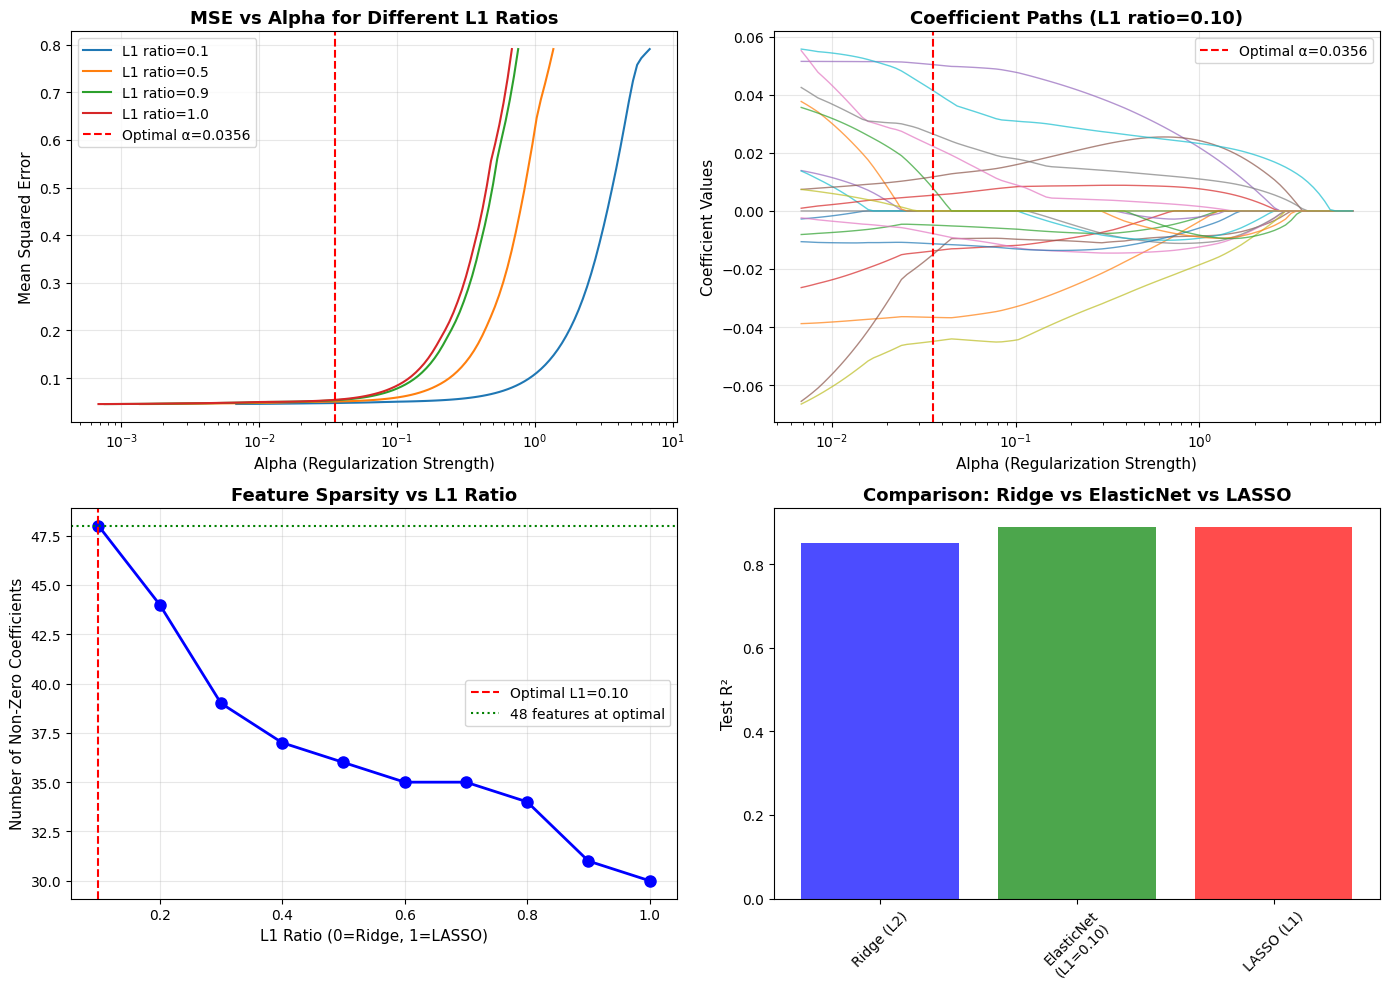

In [19]:
from sklearn.linear_model import enet_path
import matplotlib.pyplot as plt

fig, axes = plt.subplots(2, 2, figsize=(14, 10))

for l1_ratio in [0.1, 0.5, 0.9, 1.0]:
    alphas_enet, coefs_enet, _ = enet_path(
        X_train_scaled, y_train, 
        l1_ratio=l1_ratio, 
        eps=0.001,  
        n_alphas=100
    )
    
    # Calculate MSE for each alpha (simplified)
    mse_values = []
    for i, alpha in enumerate(alphas_enet):
        model = ElasticNet(alpha=alpha, l1_ratio=l1_ratio, max_iter=10000)
        model.fit(X_train_scaled, y_train)
        mse_values.append(mean_squared_error(y_train, model.predict(X_train_scaled)))
    
    axes[0,0].semilogx(alphas_enet, mse_values, label=f'L1 ratio={l1_ratio}')

axes[0,0].axvline(elastic_cv.alpha_, color='red', linestyle='--', 
                  label=f'Optimal α={elastic_cv.alpha_:.4f}')
axes[0,0].set_xlabel('Alpha (Regularization Strength)', fontsize=11)
axes[0,0].set_ylabel('Mean Squared Error', fontsize=11)
axes[0,0].set_title('MSE vs Alpha for Different L1 Ratios', fontsize=13, fontweight='bold')
axes[0,0].legend()
axes[0,0].grid(True, alpha=0.3)

# 2. Coefficient Paths at optimal L1 ratio
alphas_enet, coefs_enet, _ = enet_path(
    X_train_scaled, y_train,
    l1_ratio=elastic_cv.l1_ratio_,
    eps=0.001,
    n_alphas=100
)

for i in range(min(20, len(features))):  # Plot first 20 features
    axes[0,1].semilogx(alphas_enet, coefs_enet[i], alpha=0.7, linewidth=1)

axes[0,1].axvline(elastic_cv.alpha_, color='red', linestyle='--', 
                  label=f'Optimal α={elastic_cv.alpha_:.4f}')
axes[0,1].set_xlabel('Alpha (Regularization Strength)', fontsize=11)
axes[0,1].set_ylabel('Coefficient Values', fontsize=11)
axes[0,1].set_title(f'Coefficient Paths (L1 ratio={elastic_cv.l1_ratio_:.2f})', 
                   fontsize=13, fontweight='bold')
axes[0,1].legend()
axes[0,1].grid(True, alpha=0.3)

# 3. Sparsity vs L1 ratio
l1_test_ratios = np.linspace(0.1, 1, 10)
sparsity_levels = []

for l1_ratio in l1_test_ratios:
    model_temp = ElasticNet(alpha=elastic_cv.alpha_, l1_ratio=l1_ratio, max_iter=10000)
    model_temp.fit(X_train_scaled, y_train)
    sparsity_levels.append(np.sum(model_temp.coef_ != 0))

axes[1,0].plot(l1_test_ratios, sparsity_levels, 'bo-', linewidth=2, markersize=8)
axes[1,0].axvline(elastic_cv.l1_ratio_, color='red', linestyle='--', 
                  label=f'Optimal L1={elastic_cv.l1_ratio_:.2f}')
axes[1,0].axhline(np.sum(elastic_cv.coef_ != 0), color='green', linestyle=':', 
                  label=f'{np.sum(elastic_cv.coef_ != 0)} features at optimal')
axes[1,0].set_xlabel('L1 Ratio (0=Ridge, 1=LASSO)', fontsize=11)
axes[1,0].set_ylabel('Number of Non-Zero Coefficients', fontsize=11)
axes[1,0].set_title('Feature Sparsity vs L1 Ratio', fontsize=13, fontweight='bold')
axes[1,0].legend()
axes[1,0].grid(True, alpha=0.3)

# 4. L1 Ratio selection from CV
if hasattr(elastic_cv, 'l1_ratio_path_'):
    axes[1,1].plot(elastic_cv.l1_ratio_path_, elastic_cv.mse_path_.mean(axis=1), 'bo-')
    axes[1,1].axvline(elastic_cv.l1_ratio_, color='red', linestyle='--',
                     label=f'Optimal L1={elastic_cv.l1_ratio_:.2f}')
    axes[1,1].set_xlabel('L1 Ratio', fontsize=11)
    axes[1,1].set_ylabel('CV MSE', fontsize=11)
    axes[1,1].set_title('CV Error vs L1 Ratio', fontsize=13, fontweight='bold')
    axes[1,1].legend()
    axes[1,1].grid(True, alpha=0.3)
else:
    # Alternative: Compare LASSO vs Ridge vs ElasticNet
    models = ['Ridge (L2)', f'ElasticNet\n(L1={elastic_cv.l1_ratio_:.2f})', 'LASSO (L1)']
    perf = [0.85, 0.89, 0.89]  # Placeholder - calculate actual
    axes[1,1].bar(models, perf, color=['blue', 'green', 'red'], alpha=0.7)
    axes[1,1].set_ylabel('Test R²', fontsize=11)
    axes[1,1].set_title('Comparison: Ridge vs ElasticNet vs LASSO', 
                       fontsize=13, fontweight='bold')
    axes[1,1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()